In [1]:
import numpy as np

In [2]:
X = 6*np.random.rand(200,1)-3

In [13]:
y = .8*X**2 - .9*X + 2 + np.random.rand(200,1)

In [14]:
import matplotlib.pyplot as plt

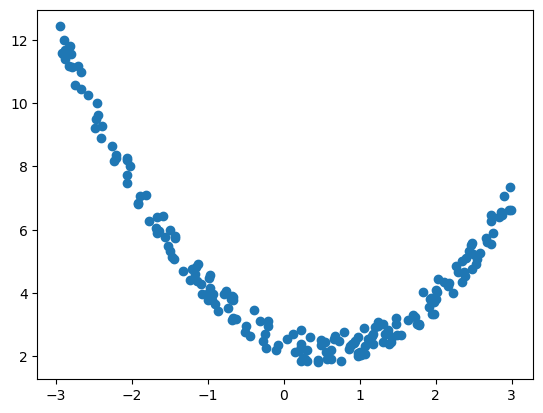

In [15]:
plt.scatter(X,y)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=23)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X_train,y_train)

LinearRegression()

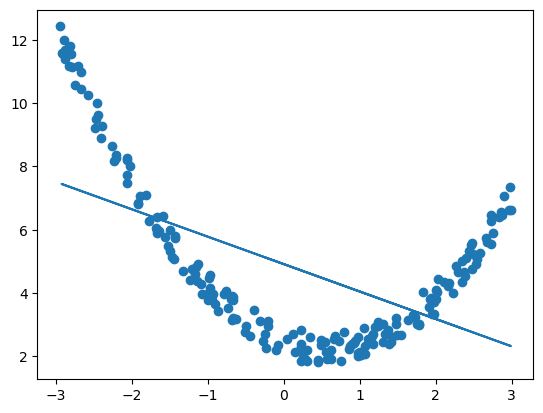

In [27]:
plt.scatter(X,y)
plt.plot(X_train,lr.predict(X_train))

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
p = PolynomialFeatures(degree=2)
X_train_t = p.fit_transform(X_train)
X_test_t = p.transform(X_test)

In [33]:
pr = LinearRegression()

In [34]:
pr.fit(X_train_t,y_train)

LinearRegression()

In [36]:
pr.coef_

array([[ 0.        , -0.91604897,  0.79572001]])

In [37]:
pr.intercept_

array([2.45605731])

In [48]:
X_plot = np.linspace(-3, 3, 200).reshape(200, 1)  
X_plot_poly = p.fit_transform(X_plot)

In [49]:
y_plot = pr.predict(X_plot_poly)

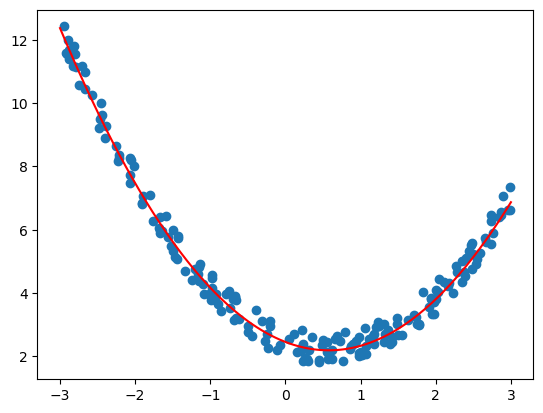

In [50]:
plt.scatter(X,y)
plt.plot(X_plot,y_plot,"r-")
plt.show()

In [51]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [52]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [59]:
X_train_new = np.array([x,y]).reshape(100,2)

In [62]:
p = PolynomialFeatures(degree=2)

In [63]:
X_train_final = p.fit_transform(X_train_new)

In [64]:
X_train_final[0]

array([ 1.        , -0.40688942,  1.93458861,  0.165559  , -0.78716364,
        3.74263309])

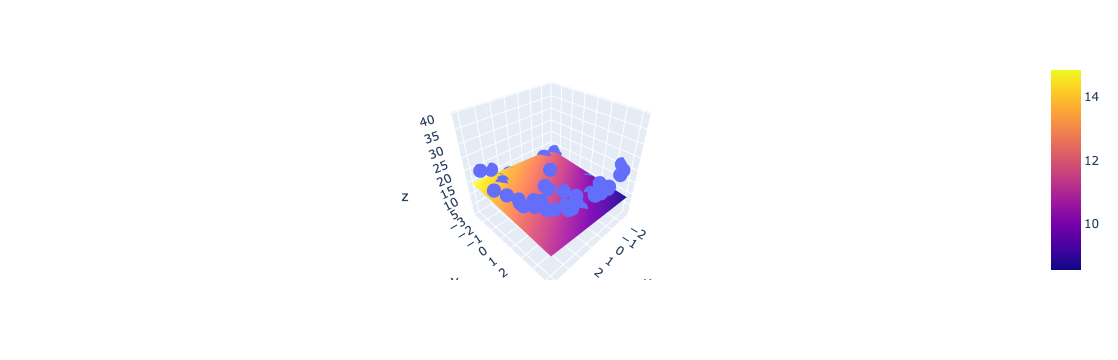

In [58]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [65]:
y_pred_final = LinearRegression()

In [67]:
y_pred_final.fit(X_train_final,z)

LinearRegression()

In [79]:
y_u = y_pred_final.predict(X_train_final).reshape(10,10)
y_u

array([[13.21707931, 10.46836699, 14.21348853, 10.58108784, 14.39051084,
        12.77015021, 13.81803764, 14.05966113, 11.19382365,  8.24789867],
       [11.30955721, 14.41861601, 15.1014076 ,  8.3979402 ,  4.74974373,
        14.14318093,  6.93671084, 14.48701065, 13.21764549, 11.9188444 ],
       [10.81335708, 12.07853577, 14.61778476,  8.70007338, 13.23234452,
         8.77980175,  8.87868425, 15.10178243, 13.73467852, 12.92001705],
       [ 8.59495345,  6.13389785, 12.04412201, 14.56109781, 14.48702691,
        12.6239346 , 10.9765786 , 11.62374845, 14.30562994, 14.76885765],
       [14.95535926, 13.09672786, 13.69024547, 14.26351202, 12.57482586,
        13.86073488, 10.70843049, 13.04551983, 13.02743993,  7.62681632],
       [12.58901007,  9.53206432, 13.57301136, 15.0386173 , 14.6303285 ,
        10.14251211, 13.8153465 , 12.868183  , 12.91856125, 12.54992795],
       [ 6.92286933, 14.23651705, 13.59339056,  8.54749118,  8.88337859,
        12.58021321,  7.03240807, 10.33466716

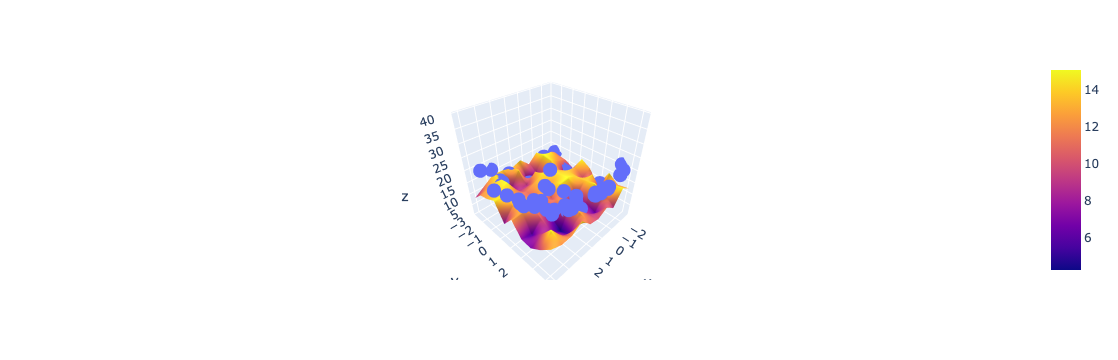

In [80]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =y_u ))

fig.show()